## Data Understanding for Instagram Dataset
**Objective:**

The objective of this notebook is explore, analyze, and understand the Instagram dataset to identify patterns, relationships, and potential insights that could help in modeling or decision-making.

### Introduction to Data Understanding

**What is Data Understanding?**

Data understanding involves an in-depth analysis of the dataset to comprehend its structure, content, and quality. It is the first critical step in any data science project that helps in discovering useful information, identifying potential issues, and forming hypotheses for further analysis.

**Why is Data Understanding Important?**

It is essential for:
    - Identifying data quality issues such as missing values, outliers, and inconsistencies.
    - Understanding the distribution and relationships within the data.
    - Making informed decisions on data preprocessing and model selection.

**Overview of the Data Understanding Process:**

This includes collecting data, initial exploration, data quality assessment, data profiling, visualization, correlation analysis, segmentation, and documentation.


### Data Collection

Here we collect and import our data from various sources

In [1]:
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('../data/raw/instagram_posts.csv')
data.head() # Display the first 5 rows

,id,videoViewCount,commentsCount,timestamp,url,ownerId,productType,type,videoDuration,likesCount,videoPlayCount,ownerUsername,ownerFullName
0,3.377730e+18,0,2,2024-05-28T06:13:04.000Z,https://www.instagram.com/p/C7gG02Io8z5/,48506231918,cloth,Image,0.000,5,0,aimee_apparel_,CHIAMAKA || LAGOS CLOTH VENDOR || ANAMBRA CLOT...
1,3.378452e+18,255,15,2024-05-29T06:08:32.000Z,https://www.instagram.com/p/C7irDFfogZg/,48506231918,cloth,Video,20.166,37,541,aimee_apparel_,CHIAMAKA || LAGOS CLOTH VENDOR || ANAMBRA CLOT...
2,3.377729e+18,632,51,2024-05-28T06:11:10.000Z,https://www.instagram.com/p/C7gGksNIQ_d/,48506231918,cloth,Video,15.138,112,1665,aimee_apparel_,CHIAMAKA || LAGOS CLOTH VENDOR || ANAMBRA CLOT...
3,3.376985e+18,643,81,2024-05-27T06:00:06.000Z,https://www.instagram.com/p/C7ddlvgoxK1/,4885237291,cloth,Video,16.902,143,1657,veecki._,VEE 👑 || Creator 📸
4,3.377065e+18,966,151,2024-05-27T08:16:41.000Z,https://www.instagram.com/p/C7dvnWHIve9/,48506231918,cloth,Video,43.675,197,2215,aimee_apparel_,CHIAMAKA || LAGOS CLOTH VENDOR || ANAMBRA CLOT...


### Initial Data Exploration

Here we perform initial exploration to understand the structure and distribution of the data

In [2]:
# Display basic information about the dataset
print(data.info()) # Provides an overview of the dataset including data types and non-null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2090 non-null   float64
 1   videoViewCount  2090 non-null   int64  
 2   commentsCount   2090 non-null   int64  
 3   timestamp       2090 non-null   object 
 4   url             2090 non-null   object 
 5   ownerId         2090 non-null   int64  
 6   productType     2090 non-null   object 
 7   type            2090 non-null   object 
 8   videoDuration   2090 non-null   float64
 9   likesCount      2090 non-null   int64  
 10  videoPlayCount  2090 non-null   int64  
 11  ownerUsername   2090 non-null   object 
 12  ownerFullName   2090 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 212.4+ KB
None


In [3]:
print(data.describe(include='all')) # Gives summary statistics for both numerical and categorical features

                  id  videoViewCount  commentsCount                 timestamp  \
count   2.090000e+03    2.090000e+03    2090.000000                      2090   
unique           NaN             NaN            NaN                      2088   
top              NaN             NaN            NaN  2024-03-01T07:17:24.000Z   
freq             NaN             NaN            NaN                         2   
mean    3.166471e+18    1.179869e+04      93.111005                       NaN   
std     4.628934e+17    1.014652e+05     575.453428                       NaN   
min     4.475269e+17    0.000000e+00       0.000000                       NaN   
25%     3.217710e+18    0.000000e+00       0.000000                       NaN   
50%     3.354768e+18    0.000000e+00       2.000000                       NaN   
75%     3.372784e+18    1.395750e+03      12.000000                       NaN   
max     3.380130e+18    3.902364e+06   10190.000000                       NaN   

                           

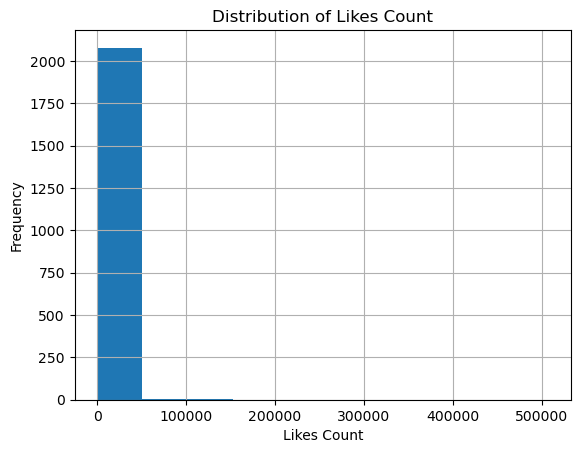

In [4]:
import matplotlib.pyplot as plt

# Visualize the distribution of likesCount
data['likesCount'].hist(bins=10)
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.title('Distribution of Likes Count')
plt.show()

### Data Quality Assessment

Here we assess the quality of the data to identify any issues that need to be addressed

In [5]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 id                0
videoViewCount    0
commentsCount     0
timestamp         0
url               0
ownerId           0
productType       0
type              0
videoDuration     0
likesCount        0
videoPlayCount    0
ownerUsername     0
ownerFullName     0
dtype: int64


In [6]:
# Detect outliers using IQR
Q1 = data['likesCount'].quantile(0.25)
Q3 = data['likesCount'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['likesCount'] < (Q1 - 1.5 * IQR)) | (data['likesCount'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in likesCount: {outliers.shape[0]}")

Number of outliers in likesCount: 308


### Data Profiling

Here we create detailed profiles of the data to understand its characteristics


In [7]:
# Summary statistics for numerical features
numerical_summary = data.describe()
print(numerical_summary)

                 id  videoViewCount  commentsCount       ownerId  \
count  2.090000e+03    2.090000e+03    2090.000000  2.090000e+03   
mean   3.166471e+18    1.179869e+04      93.111005  5.485008e+09   
std    4.628934e+17    1.014652e+05     575.453428  1.271895e+10   
min    4.475269e+17    0.000000e+00       0.000000  5.552279e+07   
25%    3.217710e+18    0.000000e+00       0.000000  4.007456e+08   
50%    3.354768e+18    0.000000e+00       2.000000  1.229047e+09   
75%    3.372784e+18    1.395750e+03      12.000000  2.521342e+09   
max    3.380130e+18    3.902364e+06   10190.000000  6.624476e+10   

       videoDuration     likesCount  videoPlayCount  
count    2090.000000    2090.000000    2.090000e+03  
mean       22.905321    1381.767943    2.723506e+04  
std        79.696425   14455.490132    2.088098e+05  
min         0.000000      -1.000000    0.000000e+00  
25%         0.000000       3.000000    0.000000e+00  
50%         0.000000      29.000000    0.000000e+00  
75%      

In [8]:
# Summary statistics for categorical features
product_type_counts = data['productType'].value_counts()
type_counts = data['type'].value_counts()
print("Product Type Counts:\n", product_type_counts)
print("\nType Counts:\n", type_counts)

Product Type Counts:
 productType
Entertainment               1079
Beauty products              239
blog                         200
Content creation/Tourism     153
food                         147
cloth                        100
food/cakes                    66
Housing                       59
Logistics                     47
Name: count, dtype: int64

Type Counts:
 type
Image    1141
Video     949
Name: count, dtype: int64


### Data Visualization

Here we use data visualization techniques to gain insights into the data


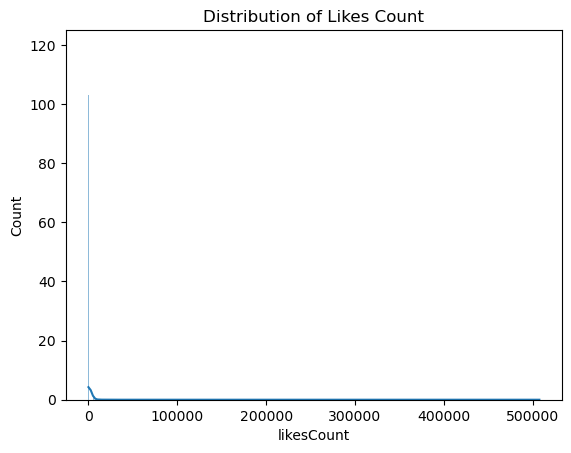

In [9]:
import seaborn as sns

# Visualize the distribution of likesCount
sns.histplot(data['likesCount'], kde=True)
plt.title('Distribution of Likes Count')
plt.ylim(0, 125)
plt.show()

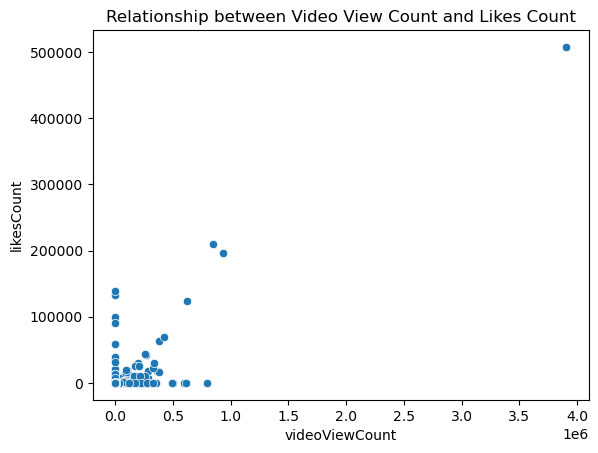

In [10]:
# Visualize the relationship between videoViewCount and likesCount
sns.scatterplot(x='videoViewCount', y='likesCount', data=data)
plt.title('Relationship between Video View Count and Likes Count')
plt.show()

### Data Correaltion Analysis

Analyze correlations between features to identify potential relationships

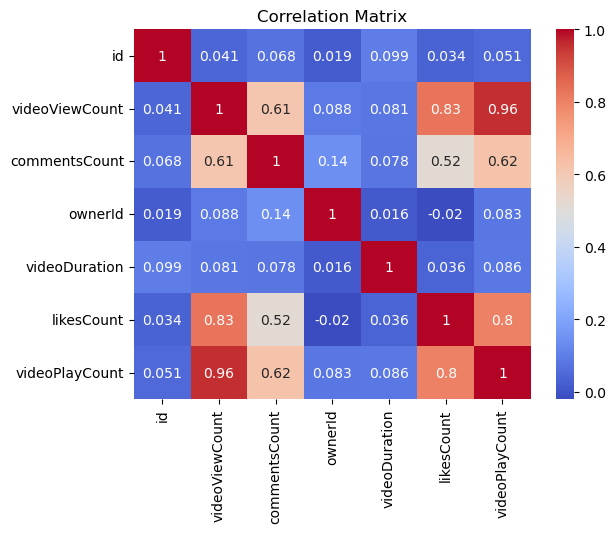

In [11]:
# Calculate correlation matrix
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Data Segmentation

Here we segment the data into meaningful groups for further analysis

C:\Users\dilan\anaconda3\envs\mentoring\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


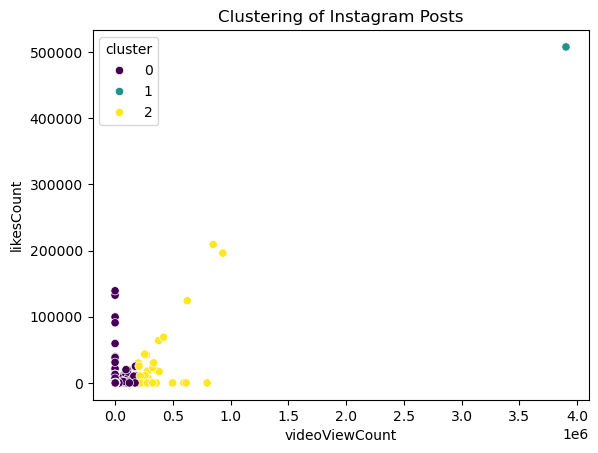

In [12]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['videoViewCount', 'likesCount']])

# Visualize clusters
sns.scatterplot(x='videoViewCount', y='likesCount', hue='cluster', data=data, palette='viridis')
plt.title('Clustering of Instagram Posts')
plt.show()

### Data Documentation

Here we document the data understanding process and findings

#### Creationg Data Dictionaries

- **id**: Unique identifier for each post.
- **videoViewCount**: Number of views if the post is a video.
- **commentsCount**: Number of comments on the post.
- **timestamp**: Date and time when the post was published.
- **url**: URL of the Instagram post.
- **ownerId**: Unique identifier of the post's owner.
- **productType**: Category of the content (e.g., 'cloth').
- **type**: Type of the post (e.g., 'Image', 'Video').
- **videoDuration**: Duration of the video (if applicable).
- **likesCount**: Number of likes on the post.
- **videoPlayCount**: Number of times the video was played.
- **ownerUsername**: Username of the post owner.
- **ownerFullName**: Full name of the post owner.lished.


#### Summarizing Key Insights

- **Data Quality**: No significant missing values were found, but there are some outliers in the likesCount column.
- **Feature Distributions**: likesCount shows a right-skewed distribution; some posts receive significantly higher likes.
- **Correlations**: Strong correlation found between videoViewCount and likesCount.
- **Data Segmentation**: Posts can be segmented into different clusters, revealing different patterns in engagement.
- The majority of posts are of type "Image"
- High correlation observed between videoViewCount and likesCount.